# <font color='blue'>Deals e Leads</font>
________________

<p>Autor: Paulo Alozen</p>
<p>Data: 12.02.2019</p>
<p>Data Prevista Entrega: 01.04.2019</p>


## Descrição do problema:
______
<p> Utilizar os dados de Deals da área comercial em conjunto com os dados de Leads da área de marketing para 
atingir os seguinte objetivos:</p>

<p>1) Classificar em grupos por semelhança, os dados de deals/leads (Clusterização);</p>
<p>2) Definir qual os principais fatores para a conversão dos leads por vendas;</p>
<p>3) Modelo com o score de probabilidade para converter um lead em uma venda;</p>

## <font color='blue'> Índice:</font>

* [1. Leitura e entendimento do arquivo](#leitura)
* [2. Ajuste dos tipo de dados](#ajuste_dados)
* [3. Derivação de novos campos](#derivacao_campos)


<h2><a id="leitura" class="anchor">1 - Leitura e Entendimento do Arquivo</a></h2>

In [1]:
# Bibliotecas:
import pandas as pd

# Configurações Jupyter Notebooks
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

# Ler arquivo Deals
df_deals = pd.read_csv('arquivos/deals_v2.csv', sep=';')

# Shape arquivo Deals
print("Número de linhas: " + str(df_deals.shape[0]))
print("Número de Colunas: " + str(df_deals.shape[1]))

Número de linhas: 1843
Número de Colunas: 95


In [2]:
# Verificar arquivo:
df_deals.head()

,stage,title,value,implementacao,volume_de_admissoes_mensal,numero_de_funcionarios,won_time,owner,pipeline,lost_reason,interesse,origem_do_deal,status,motivo_de_perda_detalhado,mercado,expectativa_de_produto,activities_to_do,banco_parceiro_pgt,contact_person,creator,done_activities,email_messages_count,organization,probability,qtd_clts,sistema_de_folha_de_pgto,sistema_de_ponto,source,source1,tem_adiantamento,tem_conta,total_activities,currency,visible_to,weighted_value,deal_created_date,deal_created_year,deal_created_month,deal_created_day,deal_created_quarter,deal_created_weekday,lost_time_date,lost_time_year,lost_time_month,lost_time_day,lost_time_quarter,lost_time_weekday,last_activity_date_date,last_activity_date_year,last_activity_date_month,last_activity_date_day,last_activity_date_quarter,last_activity_date_weekday,last_email_received_date,last_email_received_year,last_email_received_month,last_email_received_day,last_email_received_quarter,last_email_received_weekday,last_email_sent_date,last_email_sent_year,last_email_sent_month,last_email_sent_day,last_email_sent_quarter,last_email_sent_weekday,last_stage_change_date,last_stage_change_year,last_stage_change_month,last_stage_change_day,last_stage_change_quarter,last_stage_change_weekday,expected_close_date_date,expected_close_date_year,expected_close_date_month,expected_close_date_day,expected_close_date_quarter,expected_close_date_weekday,deal_closed_on_date,deal_closed_on_year,deal_closed_on_month,deal_closed_on_day,deal_closed_on_quarter,deal_closed_on_weekday,next_activity_date_date,next_activity_date_year,next_activity_date_month,next_activity_date_day,next_activity_date_quarter,next_activity_date_weekday,update_time_date,update_time_year,update_time_month,update_time_day,update_time_quarter,update_time_weekday
0,Compromisso,Ipiranga,1400.0,NaN,50.0,3500.0,NaN,Guilherme Salam,Canal Direto,Não atendeu as expectativas,Admissão,Inbound,Lost,Precisa integrar com FPW,Varejo,NaN,1,NaN,Alice Xavier,Guilherme Salam,15,18,Ipiranga,NaN,NaN,FPW,NaN,NaN,NaN,NaN,NaN,16,BRL,Entire company,"532,00 BRL",2018-11-06,2018,11,6,4,1,2019-01-23,2019.0,1.0,23.0,1.0,2.0,2018-12-11,2018.0,12.0,11.0,4.0,1.0,2018-11-14,2018.0,11.0,14.0,4.0,2.0,2018-11-22,2018.0,11.0,22.0,4.0,3.0,2018-11-12,2018.0,11.0,12.0,4.0,0.0,2019-02-28,2019.0,2.0,28.0,1.0,3.0,2019-01-23,2019.0,1.0,23.0,1.0,2.0,2019-02-19,2019.0,2.0,19.0,1.0,1.0,2019-01-23,2019,1,23,1,2
1,Proposta Comercial,Lab. Exame,1000.0,2500.0,12.0,105.0,NaN,Adriana Campos,Canal Direto,Não atendeu as expectativas,Plano Completo,Inbound,Lost,Queria um sistema que subisse recibo de ferias...,Saúde,"Férias - Recibo de férias, Férias - Aviso sobr...",0,NaN,Elizângela Alvarenga,Henrique Carvalho,12,8,Lab. Exame,NaN,NaN,Contabilidade Externa,NaN,NaN,NaN,NaN,NaN,12,BRL,Entire company,"540,00 BRL",2018-12-03,2018,12,3,4,0,2019-01-23,2019.0,1.0,23.0,1.0,2.0,2019-01-22,2019.0,1.0,22.0,1.0,1.0,2019-01-15,2019.0,1.0,15.0,1.0,1.0,2019-01-15,2019.0,1.0,15.0,1.0,1.0,2018-12-10,2018.0,12.0,10.0,4.0,0.0,2019-01-31,2019.0,1.0,31.0,1.0,3.0,2019-01-23,2019.0,1.0,23.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-23,2019,1,23,1,2
2,Conexão,DTintas,1950.0,NaN,5.0,35.0,NaN,Tamiris Januário,Canal Direto,Não tem budget,"Holerites, Plano Completo",Inbound,Lost,NaN,NaN,NaN,0,NaN,Raquel,Tamiris Januário,6,2,DTintas,NaN,NaN,Contabilidade Externa,NaN,NaN,NaN,NaN,NaN,6,BRL,Entire company,"351,00 BRL",2019-01-21,2019,1,21,1,0,2019-01-23,2019.0,1.0,23.0,1.0,2.0,2019-01-22,2019.0,1.0,22.0,1.0,1.0,2019-01-22,2019.0,1.0,22.0,1.0,1.0,2019-01-23,2019.0,1.0,23.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28,2019.0,2.0,28.0,1.0,3.0,2019-01-23,2019.0,1.0,23.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-23,2019,1,23,1,2
3,Proposta Comercial,[Contably] Três Contas,900.0,3500.0,3.0,150.0,NaN,José Luiz Souza,Canal Direto,parceiro não avançou com op,Plano Completo,Parcerias,Lost,parceiro não avançou com op,Educacional,NaN,0,NaN,Rafael Contably,José Luiz Souza,3,0,Cotably,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3

<h2><a id="ajuste_dados" class="anchor">2 - Ajuste dos tipos de Dados</a></h2>

In [3]:
# Tratar textos
df_deals_object = df_deals.select_dtypes('object')

def print_details(column_name):
    df_temp = df_deals.loc[:,[column_name,'currency']].groupby(column_name).count().reset_index()
    df_temp = df_temp.rename(columns={'currency':'qnt'}).sort_values('qnt',ascending=False)
    print("Quantidade de categorias: ", df_temp.shape[0])
    print("Quantidade de registros em branco: ", df_deals[column_name].isna().sum())
    print()
    print(df_temp)
    print()

print_details('stage')

Quantidade de categorias:  17
Quantidade de registros em branco:  0

                  stage  qnt
4               Conexão  889
13   Proposta Comercial  234
15              Solução  158
9            Fechamento  157
2           Compromisso   83
7           Diagnóstico   77
10                Ganho   68
8           Em cadência   63
3             Conectado   34
14         Qualificação   23
0          Apresentação   20
1        Boleto Emitido   20
12             Proposta   10
6            Descoberta    3
11  Ok Formal p Janeiro    2
5          Demonstração    1
16    Validação Técnica    1



In [4]:
df_deals['stage'] = df_deals['stage'].replace('Proposta', 'Proposta Comercial')
df_deals['stage'] = df_deals['stage'].replace('Conectado', 'Conexão')
print_details('stage')

Quantidade de categorias:  15
Quantidade de registros em branco:  0

                  stage  qnt
3               Conexão  923
11   Proposta Comercial  244
13              Solução  158
8            Fechamento  157
2           Compromisso   83
6           Diagnóstico   77
9                 Ganho   68
7           Em cadência   63
12         Qualificação   23
0          Apresentação   20
1        Boleto Emitido   20
5            Descoberta    3
10  Ok Formal p Janeiro    2
4          Demonstração    1
14    Validação Técnica    1



In [5]:
# drop owner
df_deals = df_deals.drop('owner', axis = 1)
print_details('pipeline')

Quantidade de categorias:  4
Quantidade de registros em branco:  0

       pipeline   qnt
0  Canal Direto  1574
1      Outbound   186
2     Parceiros    46
3        Xerpay    37



In [9]:
df_deals = df_deals.drop('won_time', axis=1)

KeyError: "['won_time'] not found in axis"

In [11]:
print_details('lost_reason')
df_deals['lost_reason'] = df_deals['lost_reason'].replace('Não é uma prioridade no momento', 'Não é uma prioridade')
df_deals['lost_reason'] = df_deals['lost_reason'].replace('Perdemos para um concorrente', 'Perdemos para concorrência')
df_deals['lost_reason'] = df_deals['lost_reason'].replace('sem contato', 'Sem Contato')
df_deals['lost_reason'] = df_deals['lost_reason'].replace('sem Contato', 'Sem Contato')
df_deals['lost_reason'] = df_deals['lost_reason'].replace('Sem resposta', 'Sem Contato')
df_deals['lost_reason'] = df_deals['lost_reason'].replace('Deixou de responder', 'Sem Contato')
df_deals['lost_reason'] = df_deals['lost_reason'].replace('Não é prioridade', 'Não é uma prioridade')
df_deals['lost_reason'] = df_deals['lost_reason'].replace('Parou de responder', 'Sem Contato')
df_deals['lost_reason'] = df_deals['lost_reason'].replace('sem conttao', 'Sem Contato')

Quantidade de categorias:  190
Quantidade de registros em branco:  736

                                           lost_reason  qnt
63                                Não é uma prioridade  297
22                  Deals pendentes antigos da Hubspot  122
52                   Não quis dar sequência no contato  119
64                     Não é uma prioridade no momento   85
45                         Não atendeu as expectativas   76
71                          Perdemos para concorrência   54
56                                      Não tem perfil   27
94                                         Sem Contato   19
53                                      Não tem budget   17
109                                       Sem resposta   16
46                Não conseguiu aprovação internamente   13
72                        Perdemos para um concorrente   11
44                Não atendemos a tudo que ele precisa   11
169                                        sem contato    9
96                          

In [75]:
# aplicar para o dataset inteiro caixa_baixa/alta, acentuação, espaços
df_deals_object = df_deals.select_dtypes('object')

import re

def filterChar(char):
    if '*' not in char or '+' not in char or '?' not in char:
        return False
    return True

for c in df_deals_object.columns:
    for v in df_deals[c]:
        if not pd.isnull(v):
            print(v)
            v = ''.join(filter(filterChar, v))
            regex_pat = re.compile(r'' + v, flags=re.IGNORECASE)
            df_deals[c] = df_deals[c].replace(regex_pat, v.lower())
        
df_deals['stage']

# % de igualdade (dicionário) para agregar palavras

compromisso
proposta comercial
conexão
proposta comercial
proposta comercial
solução
solução
solução
diagnóstico
fechamento
solução
proposta comercial
conexão
solução
conexão
proposta comercial
proposta comercial
conexão
conexão
proposta comercial
proposta comercial
proposta comercial
conexão
proposta comercial
fechamento
apresentação
apresentação
proposta comercial
diagnóstico
conexão
conexão
apresentação
proposta comercial
fechamento
conexão
solução
fechamento
proposta comercial
proposta comercial
proposta comercial
fechamento
diagnóstico
apresentação
proposta comercial
proposta comercial
diagnóstico
diagnóstico
solução
solução
apresentação
apresentação
proposta comercial
conexão
conexão
proposta comercial
apresentação
proposta comercial
compromisso
apresentação
proposta comercial
conexão
compromisso
proposta comercial
conexão
proposta comercial
proposta comercial
apresentação
compromisso
conexão
apresentação
apresentação
validação técnica
compromisso
compromisso
apresentação
propost

conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão
conexão


solução
boleto emitido
proposta comercial
fechamento
solução
solução
conexão
ganho
conexão
solução
proposta comercial
descoberta
demonstração
conexão
proposta comercial
conexão
solução
conexão
proposta comercial
proposta comercial
compromisso
solução
solução
proposta comercial
boleto emitido
boleto emitido
proposta comercial
proposta comercial
proposta comercial
boleto emitido
proposta comercial
proposta comercial
compromisso
proposta comercial
conexão
conexão
compromisso
conexão
conexão
proposta comercial
diagnóstico
proposta comercial
proposta comercial
proposta comercial
conexão
proposta comercial
conexão
conexão
conexão
conexão
boleto emitido
proposta comercial
compromisso
conexão
proposta comercial
conexão
proposta comercial
proposta comercial
fechamento
proposta comercial
solução
conexão
conexão
proposta comercial
conexão
conexão
conexão
diagnóstico
compromisso
conexão
proposta comercial
proposta comercial
conexão
compromisso
compromisso
conexão
conexão
conexão
solução
proposta c

tiex (cópia)
hiperbalas
escritório bandeiras
negócio akio produtos alimentícios
3con
bc contabilidade
colégio meta
negócio supply tech
beneficência portuguesa
maison são paulo
gdm plasticos
negócio unyleya educacional (cópia)
enel
tecnick construtora ltda - epp
negócio telefônica do brasil
negócio grupo renac
s.a.e
use administradora
tuka rental
galileu sistemas
belem pneus ideal
talentus esquadrias
vitoria construçao
ag. forum - rafaela
negócio supply tech (cópia)
transcajuru ltda me
fujibag
sempre sim terceirização
clinica itaparica
stefanini
full - oi futuro
transportadora gobor
seleta agencia fornecedora
penso tecnologia
btg pactual's deal
incell
rede loureiro
negócio hoteis othon (cópia)
centauro
full - geru
full - printi
geekhunter
lider parking estacionamentos
gtp tecnologia
beblue brasil
informe apoio administrativo ltda
restaurante aoyama
martins & fernandes
negócio tic transportes (cópia)
atelie alimentação
cindex
idealizza tecnologia
colégio porto seguro
admissão - fidati
bo

resultados digitais
it universe
engie
bray international inc
cristiano ramos
neoassist
celiahelena.com.br
teto
lojaskd móveis
equiplano
expertfarm.com.br - novo negócio
gointegro
dissulba
neoway
timbre rh
clínica sim
blinks
geekie
fit contábil
willian
w6 solutions
ateliê oral -
zup
modern logistics
raito
omno contabilidade
cobli
flormel -
enviou - novo negócio
total ip - novo negócio
maila marques rodrigues.
leila anjos
jackson
conquistataxi prestadora ltda-me
endless
vinilburger.com.br - novo negócio
estacionamento park bh
regulus contabil
bencorp
ghfly - novo negócio
belugadb
benes.a.e
grupo gaia
marchezan
fundacao lemann
sandropissini.adv.br
allis
movile
speedo
sideral pré moldados
de longhi group
grupo services reaval
beblue brasil
arquivar.com
hotelli serviços digitais
clickbus - outbound
direct talk
marcio
endo medical
kty engenharia
grupo gnc
combitrans
higiservicos.com.br
bob's - loja vgs
raul
seventi.com.br - novo negócio
cbs med - novo negócio
gdk s/a
vcsorriso.com.br - novo 

negócio dextra
negócio hortifruti
negócio hotel emiliano
negócio mcs tecnologia
negócio lsk comércio e serviços ltda
contar
grand hyatt são paulo
grand hyatt são paulo
negócio grupo crm - kopenhagen/chocolates brasil cacau
negócio madero | durski (cópia)| durski|negócio madero | durski (cópia)| durski (cópia)|negócio madero | durski (cópia)| durski (cópia)|negócio madero | durski (cópia)| durski (cópia)|negócio madero | durski (cópia)| durski
alphabeto
negócio grupo parmê
bizcapital
manserv's Deal (cópia)
br insurance
nexoos
magrathea labs
Negócio izio MARKETING DIRETO LTDA EPP (Espiral Coaching e consultoria)
Negócio izio MARKETING DIRETO LTDA EPP (Espiral Coaching e consultoria (cópia))
negócio leroy merlin brasil
negócio monqi
monqi
fcdl-mg
redxcorp
contai
youse
negócio metasa
negócio extrafarma sa
negócio casa&vídeo
carvalho e ass assess contabil ltda
donale - zg soluções
edenred
boniatti
forte representações
negócio tiex
mari goumert
negócio grupo fleury
negócio grupo planus
fabri

canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto

canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto
canal direto

................
..............................
..............
...........................
...........................
...........................
...................
....................
....................
...................
....................
....................
...
....................
....................
.................................
..............
.................................
....................
...........................
....................
...............
........................
...............
....................
.................................
.................................
.................................
..............
....................
....................
.................................
....................
....................
...............
....................
....................
.................................
....................
...........................
.................................
...........................
..............

..................................
..................................
..................................
..................................
....................
....................
....................................
....................
....................................
....................
...............................
....................................
................
....................
....................
.....................................
....................
....................
..........................
..........................
....................
....................
....................
....................
....................
..........................
....................
....................
....................
....................
....................................
....................
....................................
....................
....................
....................
....................
....................................
.....
..

plano completo
holerites
admissão, holerites
plano completo
holerites
plano completo
plano completo
holerites
plano completo
admissão
plano completo
holerites
holerites
admissão
admissão, plano completo
plano completo
admissão, plano completo
plano completo
holerites, plano completo
holerites
plano completo
admissão
plano completo
plano completo
plano completo
admissão
plano completo
plano completo
holerites
plano completo
admissão, holerites, plano completo, parceria
plano completo
plano completo
plano completo
admissão, holerites
plano completo
admissão
admissão, holerites
plano completo
admissão, holerites, plano completo
plano completo
plano completo
plano completo
plano completo
admissão
plano completo
plano completo
admissão
plano completo
plano completo
plano completo
plano completo
parceria
holerites
plano completo
admissão
plano completo
admissão
plano completo
admissão
admissão
plano completo
plano completo
plano completo
plano completo
holerites
admissão
plano completo
holer

upsell na base
inbound
eventos
upsell na base
inbound
inbound
upsell na base
inbound
inbound
inbound
inbound
eventos
upsell na base
inbound
inbound
eventos
upsell na base
upsell na base
inbound
inbound
upsell na base
sdr outbound
inbound
inbound
upsell na base
inbound
inbound
Entrou em contato (Intercom/Telefone)
upsell na base
inbound
outbound
inbound
outbound
outbound
outbound
outbound
outbound
outbound
outbound
sdr outbound
inbound
Entrou em contato (Intercom/Telefone)
inbound
inbound
Entrou em contato (Intercom/Telefone)
inbound
inbound
inbound
inbound
inbound
inbound
inbound
inbound
inbound
sdr outbound
inbound
inbound
inbound
Entrou em contato (Intercom/Telefone)
parcerias
inbound
outbound
inbound
inbound
inbound
outbound
inbound
inbound
inbound
eventos
inbound
inbound
inbound
inbound
indicação
inbound
inbound
inbound
inbound
inbound
inbound
sdr outbound
inbound
outbound
inbound
inbound
Entrou em contato (Intercom/Telefone)
inbound
inbound
sdr outbound
inbound
Entrou em contato (

inbound
inbound
inbound
inbound
inbound
inbound
inbound
inbound
inbound
inbound
inbound
inbound
inbound
inbound
inbound
inbound
inbound
inbound
Entrou em contato (Intercom/Telefone)
inbound
inbound
inbound
Entrou em contato (Intercom/Telefone)
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
lost
l

open
open
open
won
won
open
open
open
open
open
open
open
open
open
open
won
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
open
precisa integrar com fpw
queria um sistema que subisse recibo de ferias e o colaborador fizesse a assinatura desse recibo, e se possível que tivesse a opção de recibo de ferias nas opções de documentos no holerite, outro ponto sera a contagem de ferias para pessoas que ficaram afastadas da empresa, se a plataforma faz o lembrete desses eventos.
parceiro não avançou com op
parceiro não avançou com op
parceiro não avançou com op
parceiro não avançou com op
parceiro não avançou com op
fora de prioridade para os processos no momento, farei fup em fev
vai colocar o erp de folha primeiro.
1 - Interface Api com o GED da Vale. Documentum da Op

alimentação
serviços
tecnologia
seguradora
logística
varejo
tecnologia
tecnologia
indústria
varejo
finanças
serviços
varejo
saúde
indústria
educacional
contabilidade
varejo
outros
varejo
varejo
tecnologia
serviços
serviços
varejo
saúde
indústria
varejo
contabilidade
serviços
alimentação
tecnologia
serviços
varejo
serviços
indústria
tecnologia
tecnologia
serviços
tecnologia
serviços
varejo
indústria
indústria
tecnologia
outros
varejo
indústria
serviços
serviços
educacional
terceirização
serviços
contabilidade
marketing
tecnologia
outros
varejo
marketing
tecnologia
tecnologia
consultoria
seguradora
tecnologia
saúde
logística
tecnologia
serviços
tecnologia
tecnologia
saúde
serviços
tecnologia
serviços
alimentação
indústria
consultoria
tecnologia
tecnologia
educacional
serviços
educacional
alimentação
tecnologia
serviços
tecnologia
tecnologia
outros
outros
tecnologia
varejo
educacional
tecnologia
serviços
outros
logística
saúde
tecnologia
finanças
finanças
tecnologia
consultoria
terceiriza

walter
felipe
adriana
pedro
andreza
rafael
sirlene
andrea
felipe sobral
eliane
joyce da silva pereira
américo gameiro
jane costa
alessandra
victor gatti martins
emanoelle
thais aline belaz
lívia maria fecchio
jader seccio
augusto moyses benelli
amanda meire martins
fernanda santiago
rafael de
joão marin
bianca
tatiane pedroso
carlos luciano lira
patricia
aline azevedo
débora
denise mendonca
rejane cavalcante
charlene moreira
sibeli
samira
rafael rabelo
cristian de antoni
fellipe couto
taynara
vanessa
alda cristiana oliveira de conto
helios neto - gerente administrativo, financeiro & recursos humanos
tiago da silva fernandes
larissa kitaski
ana nicollette
rogerio oliveira
lais cury
wilson
luiz felipe
antonio carlos ramos de miranda
ronny
josé adolfo
aline azevedo
bruno bazanella
angélica assunção
cris
monica
angelica
maíra
magda regina - coordenadora de rh
sandra oliveira
moacir
mohamad omar zeitoun
gisele
elaine
caroline
janaina agapito
lucas ricci
adalgisa
laura mendes
carla eliza dos

jane darq
flavia brandao
conceicao gomes gomes
wanderson
lucas leandro gonçalves ferreira
ronaldo
thaynara
daniela camoles
-
nadja
marcelo pinheiro pinheiro
itamar
suelen ramalho fernandes
daniela silva
benedito borges de menezes
josé vilemen da silva
ludmila vicente
tamara fernandes
elaine santos
camila rh
cristiane santos da silva
schirllei
josé carlos f. moreira
carlos
jonas koxne
jacyara dias
rodrigo palos
gisele mendes
ntp.fpc
murilo ronchesel
sofia b c da r lima
josé cerqueira
junior
evandro loredo
bruno de marco
macolly barbosa da silva
karine amora
daniela mota
aline nesi
yara aparecida santos
rubens adriano corrêa
emilia
jose carlos ribeiro
mayara coelho
fernanda
adriana
aline magarão
danilo cardoso
danilo cardoso
nadia sousa
debora celini
simone nery
gercilene mendes
max
multi laser
sonymara
pamela da silva sá
vivaldo cezar de lima ferreira
ligia franckevicius
luane vasques
bruno
fabiano siqueira
kérley
marcelo sampaio
manoel
lorraine barbosa
laise dolinski
adm
matheus cargne

samira adnan
danilo miranda lages
juliana lisboa
rayssa'
carolina baldrigher
ada rodrigues
jose da silva ramos junior
césar teixeira
emerson martins
luiza
luciano da silveira gonçalves
bruno secar
shayne
amanda meire martins
daniela gurtovoi
luana.bezerra@clickbus.com
schirllei
mario
viviane araujo dos santos
elisângela sales
janes
ester araújo
carla e luciana
thaís
edânia
sheila
ana carmen
alcidônio fornazieri de oliveira
nicole da silva santos
rafael cabreira
caroline augusta lima da silva
jucilene alves de almeida
christine grande pousa fidelis minucci
vanessa ribeiro
vanessa
karla ribeiro
ana zappa
jorge felíciano
uillian cassiano deboni da silva
dileni inglez
daniel lopes
samantha pereira
elyã barboza
danilo ramos
bruna
renata sigg
eric catarino delgado
rosângela
carolina perez
tatiana
clarice
gisele
camila bueno
christina garcia
maria
guilherme salam
henrique carvalho
tamiris januário
josé luiz souza
josé luiz souza
josé luiz souza
josé luiz souza
josé luiz souza
josé luiz souza


sérgio a. reis
adelson rossini
adelson rossini
henrique carvalho
joanderson silva
keny araujo
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
adelson rossini
michael badini
joanderson silva
adelson rossini
henrique carvalho
sérgio a. reis
adelson rossini
joanderson silva
sérgio a. reis
joanderson silva
sérgio a. reis
joanderson silva
adelson rossini
adelson rossini
sérgio a. reis
adelson rossini
joanderson silva
joanderson silva
henrique carvalho
joanderson silva
sérgio a. reis
adriana campos
sérgio a. reis
joanderson silva
sérgio a. reis
joanderson silva
joanderson silva
michael badini
henrique carvalho
adriana campos
joanderson silva
joanderson silva
joanderson silva
adelson rossini
joanderson silva
joanderson silva
adelson rossini
adriana campos
sérgio a. reis
henrique carvalho
sérgio a. reis
henrique carvalho
henrique carvalho
sérgio a. reis
sérgio a. reis
sérgio a. reis
adriana campos
michael badini
adelson rossini
sérgio a. reis
sérgio a. reis
sérgio a. re

henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
sérgio a. reis
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carv

henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
sérgio a. reis
joanderson silva
josé luiz souza
joanderson silva
josé luiz souza
henrique carvalho
henrique carvalho
henrique carvalho
guilherme salam
guilherme salam
henrique carvalho
josé luiz souza
josé luiz souza
josé luiz souza
josé luiz souza
henrique carvalho
henrique carvalho
adriana campos
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
joanderson silva
henrique carvalho
josé luiz souza
josé luiz souza
josé luiz souza
josé luiz souza
josé luiz souza
josé luiz souza
henrique carvalho
henrique carvalho
josé luiz souza
josé luiz souza
henrique carvalho
henrique carvalho
adriana campos
henrique carvalho
henrique carvalho
josé luiz souza
guilherme salam
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
josé luiz souza
joanderson silva
josé luiz souza
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique carvalho
henrique 

avante
multpex
linkdocs
rede uze - trigg
tit
la nonna di lucca
hdi seguros sa
negócio grupo m&s terceirizações
hidrovias do brasil
fatesa - faculdade de tecnologia em saúde
sterlite power
felsberg advogados
supermercado ipiranga
zetrasoft
hashdex
hoteis othon
project explo consultoria e treinamento
monetizze
engecom engenharia
tiex
hiperbalas
escritório bandeiras
akio produtos alimentícios
3con
bc contabilidade
colégio meta
supplytech
beneficência portuguesa
maison são paulo
gdm plasticos
unyleya educacional
enel
tecnick construtora ltda - epp
telefônica do brasil
grupo renac
s.a.e
use administradora
tuka rental
galileu sistemas
belem pneus ideal
talentus esquadrias
vitoria construçao
forum
supplytech
transcajuru ltda me
fujibag
sempre sim terceirização
clinica itaparica
stefanini
oi futuro
transportadora gobor
seleta agencia fornecedora
penso tecnologia
btg pactual
incell
rede loureiro
hoteis othon
centauro
geru
printi
geekhunter
lider parking estacionamentos
gtp tecnologia
beblue bra

nic recursos humanos
olist
instacarro.com
xfit supplement
ampla produtos de comunicação visual
seg saúde ocupacional
brilia
worldpackers
rodneimachadoimoveis.com.br
cirandacultural.com.br
unimed238.com.br
valecred solucoes financeiras
amaplanos.com.br
vizionbrazil.com
sumitomo rubber do brasil
cargobr
associação educacional dom bosco
arkus
webradar
piovan do brasil
grupotalentos.com.br
conectaminas.com.br
bovcontrol
ingresso rápido
infopoint software
embalagens farmacêuticas
ebanx ltda.
grupo educacional unis
decora content
mandaê
redejk.com.br
aloform.com.br
atalink telecom
grupo cdi
sinax
bionexo
bionexo
mirumagency
in company eventos e treinamentos ltda
forteterceirizacao.com.br
timol.com
maxmilhas
multilaser
spassu tecnologia e serviços
pag menos supermercado
vida máxima serviços financeiros e benefícios
impulse.net.br
vaniday
arboreconsultoria.com.br
endless
crmall
rentcars
highbras
abreast.net.br
campseg.com
vbar.com.br
valorconstrucao.com.br
nogat.com.br
fornovelho.com.br
casaem

nextt
clarion
cerc
bombril
2easy
roit
starbucks
mercadolivre
wework
siemens
unimed
casa de saude santa marcelina
cia da consulta
mcdonald's corporation
dr consulta
grupo ccr
kroton
alpargatas
ardagh group
rio apps
carpe - itv urbanismo
fdm contábil
c&a modas
grupo cordeiro de freitas
cotably
quiver
iinttec
cubos
labimagem
atlântica serviços locações
cargox
donale
grupo meta
yellow
eletronet franca
mobel moretto bebidas
claro s/a
zeedog
citrosuco
ardagh group
exitus contabilidade
caoa
fdm contábil
fdm contábil
advisorbpo
oitchau
domínio
olx
gbr
syhus.com
opportunitymaker.com
ativo contabilidade
teogoz
grupo verzani e sandrini
ifood
Chopp Time Boa Vitas  (F F chaves ME)
grupo meta
unimed (RS)
willis towers watson
logstock
time now engenharia
latf rh
abrj administradora de bens
exitus contabilidade
netshoes
latf rh
embraco
helpdesk ti tecnologia
tnh digital health s/a
bemol
cia de trade mkt
altran
walmart, inc.
odontoprev
sun plus
consultoria câmara
caixa imóveis
dml serviços
cmpc
makebet

BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL
BRL


Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire com

Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire company
Entire com

351,00 BRL
486,00 BRL
243,00 BRL
0,00 BRL
0,00 BRL
0,00 BRL
585,00 BRL
2.860,00 BRL
1.215,00 BRL
2.430,00 BRL
63,00 BRL
540,00 BRL
40,50 BRL
0,00 BRL
2.430,00 BRL
0,00 BRL
380,00 BRL
189,00 BRL
162,00 BRL
243,00 BRL
81,00 BRL
459,00 BRL
1.232,00 BRL
525,00 BRL
588,00 BRL
86,40 BRL
117,00 BRL
40,50 BRL
270,00 BRL
0,00 BRL
162,00 BRL
336,60 BRL
0,00 BRL
1.620,00 BRL
880,00 BRL
945,00 BRL
675,00 BRL
1.491,75 BRL
572,00 BRL
26,00 BRL
875,00 BRL
243,00 BRL
486,00 BRL
0,00 BRL
0,00 BRL
121,50 BRL
540,00 BRL
0,00 BRL
157,50 BRL
450,00 BRL
0,00 BRL
0,00 BRL
642,60 BRL
0,00 BRL
675,00 BRL
570,00 BRL
490,00 BRL
243,00 BRL
0,00 BRL
380,00 BRL
243,00 BRL
0,00 BRL
71,28 BRL
1.350,00 BRL
354,90 BRL
247,00 BRL
147,60 BRL
0,00 BRL
0,00 BRL
0,00 BRL
646,00 BRL
1.045,00 BRL
743,40 BRL
1.350,00 BRL
247,00 BRL
94,50 BRL
0,00 BRL
756,00 BRL
675,00 BRL
459,00 BRL
245,00 BRL
0,00 BRL
0,00 BRL
532,00 BRL
0,00 BRL
0,00 BRL
0,00 BRL
0,00 BRL
0,00 BRL
0,00 BRL
0,00 BRL
0,00 BRL
1.890,00 BRL
0,00 BRL
0,00 BRL
0,0

56,88 BRL
147,60 BRL
16,38 BRL
51,84 BRL
72,00 BRL
25,92 BRL
32,40 BRL
151,20 BRL
11,52 BRL
51,84 BRL
0,00 BRL
27,00 BRL
45,00 BRL
216,00 BRL
36,00 BRL
189,00 BRL
77,76 BRL
64,80 BRL
40,50 BRL
63,00 BRL
15,12 BRL
356,40 BRL
89,46 BRL
50,40 BRL
1,80 BRL
31,50 BRL
23,40 BRL
4,50 BRL
4,50 BRL
194,40 BRL
25,92 BRL
4,50 BRL
777,60 BRL
0,00 BRL
76,14 BRL
116,64 BRL
0,18 BRL
75,60 BRL
4,50 BRL
4,50 BRL
32,40 BRL
83,52 BRL
540,00 BRL
0,00 BRL
51,84 BRL
0,00 BRL
0,00 BRL
0,00 BRL
75,06 BRL
0,00 BRL
360,00 BRL
172,80 BRL
38,88 BRL
0,00 BRL
0,00 BRL
118,80 BRL
40,50 BRL
0,00 BRL
64,80 BRL
180,00 BRL
19,98 BRL
32,76 BRL
54,00 BRL
0,00 BRL
0,00 BRL
0,00 BRL
0,00 BRL
0,00 BRL
63,00 BRL
0,00 BRL
0,00 BRL
0,00 BRL
0,00 BRL
126,00 BRL
0,00 BRL
82,80 BRL
86,40 BRL
103,68 BRL
280,80 BRL
504,00 BRL
324,00 BRL
0,00 BRL
42,48 BRL
17,64 BRL
110,16 BRL
48,60 BRL
194,40 BRL
1.440,00 BRL
0,00 BRL
165,60 BRL
0,00 BRL
0,00 BRL
191,16 BRL
77,76 BRL
0,00 BRL
0,00 BRL
900,00 BRL
0,00 BRL
0,00 BRL
0,00 BRL
0,00 BRL
2

2018-02-19
2018-02-23
2018-03-09
2018-03-09
2018-03-09
2018-03-09
2018-03-09
2018-03-09
2018-05-10
2018-06-11
2018-06-29
2018-08-14
2018-08-21
2018-08-22
2018-08-24
2018-10-08
2018-11-01
2018-10-31
2018-11-12
2018-11-22
2018-05-28
2018-07-12
2018-06-25
2018-10-01
2018-11-05
2018-11-12
2018-10-31
2018-03-27
2018-11-22
2018-10-01
2018-04-19
2018-10-05
2018-11-05
2018-10-22
2018-10-18
2018-04-03
2018-10-24
2018-07-25
2018-08-10
2018-10-19
2018-04-26
2018-10-09
2018-11-16
2018-05-25
2018-11-23
2018-07-04
2018-06-25
2018-11-16
2018-08-29
2018-10-29
2018-11-08
2018-09-21
2018-11-05
2018-10-17
2018-10-01
2018-10-09
2018-10-26
2018-11-08
2018-10-31
2018-10-05
2018-07-18
2018-08-22
2018-11-07
2018-09-04
2018-09-19
2018-11-05
2018-11-16
2018-10-25
2018-11-05
2018-10-31
2018-09-03
2018-10-11
2018-10-31
2018-10-31
2018-08-20
2018-10-31
2018-11-05
2018-06-13
2018-11-13
2018-07-04
2018-08-10
2018-10-25
2018-11-05
2018-04-10
2018-10-31
2018-10-31
2018-06-27
2018-06-28
2018-09-17
2018-08-13
2018-08-27

2017-08-15
2017-08-17
2017-09-06
2017-06-21
2017-08-16
2017-05-25
2017-07-06
2017-08-10
2017-07-31
2017-09-18
2017-08-23
2017-06-08
2017-06-08
2017-06-13
2017-05-25
2017-07-31
2017-07-25
2017-09-18
2017-09-18
2017-08-10
2017-08-31
2017-08-31
2017-09-06
2017-09-19
2017-08-02
2017-09-18
2017-08-10
2017-09-27
2017-09-28
2017-10-04
2017-09-13
2017-08-02
2017-09-14
2017-09-28
2017-07-11
2017-09-20
2017-08-16
2017-07-12
2017-09-15
2017-06-08
2017-07-01
2017-08-07
2017-08-08
2017-08-08
2017-08-14
2017-08-31
2017-08-01
2017-08-14
2017-08-18
2017-09-14
2017-04-11
2017-08-03
2017-08-10
2017-08-23
2017-09-13
2017-08-21
2017-08-01
2017-03-09
2017-08-24
2017-08-24
2017-04-10
2017-09-30
2017-08-09
2017-07-28
2017-08-14
2017-08-08
2017-09-06
2017-08-01
2017-08-23
2017-04-03
2017-04-04
2017-04-11
2017-06-01
2017-01-10
2017-06-08
2017-07-16
2017-06-28
2017-07-05
2017-07-18
2017-07-26
2017-07-28
2017-07-31
2017-03-28
2017-07-31
2017-07-31
2017-07-26
2017-02-02
2017-08-03
2017-08-08
2017-08-09
2017-08-10

2018-08-29
2018-08-29
2018-08-29
2018-08-30
2018-08-31
2018-08-31
2018-09-03
2018-09-04
2018-09-05
2018-09-10
2018-09-10
2018-09-11
2018-09-11
2018-09-11
2018-09-12
2018-09-17
2018-09-17
2018-09-17
2018-09-18
2018-09-18
2018-09-18
2018-09-18
2018-09-19
2018-09-19
2018-09-19
2018-09-19
2018-09-20
2018-09-20
2018-09-20
2018-09-21
2018-09-21
2018-09-24
2018-09-24
2018-09-24
2018-09-24
2018-09-24
2018-09-24
2018-09-24
2018-09-25
2018-09-25
2018-09-25
2018-09-27
2018-09-27
2018-10-01
2018-10-01
2018-10-02
2018-10-02
2018-10-05
2018-10-08
2018-10-10
2018-10-10
2018-10-11
2018-10-11
2018-10-15
2018-10-15
2018-10-16
2018-10-17
2018-10-18
2018-10-19
2018-10-22
2018-10-23
2018-10-26
2018-10-26
2018-10-26
2018-10-29
2018-10-29
2018-10-29
2018-10-29
2018-10-29
2018-10-29
2018-10-30
2018-10-30
2018-10-31
2018-10-31
2018-11-01
2018-11-05
2018-11-05
2018-11-05
2018-11-05
2018-11-05
2018-11-06
2018-11-06
2018-11-06
2018-11-06
2018-11-06
2018-11-06
2018-11-06
2018-11-07
2018-11-07
2018-11-13
2018-11-13

2018-05-24
2018-05-24
2018-05-24
2018-05-23
2018-05-23
2018-05-22
2018-05-22
2018-05-22
2018-05-21
2018-05-21
2018-05-21
2018-05-18
2018-05-17
2018-05-16
2018-05-15
2018-05-15
2018-05-14
2018-05-11
2018-05-11
2018-05-11
2018-05-11
2018-05-11
2018-05-11
2018-05-11
2018-05-11
2018-05-11
2018-05-09
2018-05-08
2018-05-08
2018-05-07
2018-05-07
2018-05-07
2018-05-07
2018-05-07
2018-05-04
2018-05-04
2018-05-04
2018-05-04
2018-05-04
2018-05-04
2018-05-04
2018-05-04
2018-05-04
2018-05-04
2018-05-04
2018-05-03
2018-05-03
2018-05-02
2018-05-02
2018-05-02
2018-05-02
2018-04-30
2018-04-30
2018-04-30
2018-04-26
2018-04-26
2018-04-26
2018-04-26
2018-04-24
2018-04-24
2018-04-24
2018-04-23
2018-04-20
2018-04-20
2018-04-20
2018-04-19
2018-04-19
2018-04-19
2018-04-19
2018-04-19
2018-04-19
2018-04-19
2018-04-19
2018-04-19
2018-04-19
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-17
2018-04-17
2018-04-17
2018-04-17
2018-04-17
2018-04-17
2018-04-16
2018-04-16
2018-04-13
2018-04-13

2018-11-26
2018-11-19
2018-09-20
2018-11-27
2018-11-27
2019-01-21
2018-11-23
2018-11-23
2018-11-23
2018-11-23
2018-11-23
2018-11-23
2018-11-13
2018-11-23
2018-12-04
2018-11-22
2019-01-16
2019-01-02
2018-11-21
2018-11-19
2018-11-21
2018-11-21
2019-01-14
2018-11-23
2018-11-19
2018-11-21
2018-11-21
2018-09-27
2018-11-19
2019-01-07
2018-11-19
2018-11-05
2018-12-10
2018-11-13
2018-11-21
2018-11-08
2018-11-07
2018-11-21
2018-12-06
2018-12-06
2018-09-18
2018-12-05
2018-11-12
2018-11-21
2018-11-21
2018-11-14
2018-11-21
2018-11-07
2018-11-14
2018-11-13
2018-11-09
2019-01-23
2018-08-13
2018-11-14
2019-01-02
2018-11-21
2018-11-12
2018-11-12
2018-12-14
2018-07-24
2018-09-05
2018-11-21
2018-11-07
2018-08-29
2018-11-07
2018-11-07
2018-11-07
2019-01-22
2019-01-14
2018-11-06
2018-11-06
2018-11-16
2018-10-01
2018-11-19
2019-01-07
2018-10-31
2019-01-15
2018-12-03
2018-11-28
2018-10-29
2018-12-26
2018-11-21
2019-01-03
2018-10-31
2018-10-25
2018-10-31
2018-11-21
2018-10-26
2018-10-25
2018-10-30
2018-11-02

2018-07-20
2018-11-19
2019-01-23
2019-01-22
2019-01-28
2018-08-20
2018-11-12
2018-07-31
2018-11-28
2018-09-03
2018-08-07
2018-08-08
2019-01-22
2019-01-22
2018-09-20
2018-11-21
2018-08-23
2018-08-23
2018-08-17
2018-08-24
2018-10-02
2018-08-31
2018-08-20
2018-08-31
2018-08-22
2019-01-03
2018-09-05
2018-08-24
2018-12-19
2018-08-29
2018-09-19
2018-11-30
2018-12-17
2018-09-21
2018-09-06
2018-09-10
2018-09-10
2018-09-27
2018-11-21
2018-10-09
2018-09-13
2018-11-13
2018-09-26
2018-11-21
2018-12-20
2019-01-21
2018-11-27
2018-09-12
2019-01-22
2018-12-17
2019-01-22
2019-01-16
2018-09-25
2018-10-16
2018-12-04
2019-01-14
2018-11-21
2018-09-20
2018-09-27
2018-09-24
2018-09-24
2019-01-22
2018-09-25
2018-09-26
2019-01-23
2018-10-02
2018-10-01
2018-11-21
2018-10-17
2018-11-21
2019-01-21
2018-12-18
2019-01-17
2019-01-22
2018-10-17
2018-11-27
2018-12-17
2018-10-23
2019-01-22
2018-11-21
2019-01-10
2019-01-03
2019-01-22
2019-01-23
2018-11-22
2018-10-31
2019-01-21
2018-11-23
2018-11-22
2019-01-14
2018-12-13

2019-01-15
2019-01-15
2019-01-04
2019-01-04
2019-01-09
2019-01-11
2019-01-03
2018-12-21
2019-01-03
2019-01-02
2018-12-04
2019-01-07
2019-01-07
2019-01-04
2019-01-16
2019-01-10
2019-01-03
2018-12-14
2018-11-27
2018-11-13
2019-01-04
2018-12-21
2018-12-27
2018-12-21
2018-12-19
2018-12-18
2019-01-07
2018-12-10
2019-01-07
2018-11-30
2018-11-30
2018-11-30
2018-12-12
2018-12-05
2019-01-07
2019-01-04
2018-11-29
2018-12-14
2018-12-10
2019-01-07
2018-10-23
2018-12-12
2018-12-12
2018-12-12
2018-12-07
2018-12-03
2019-01-07
2018-12-10
2019-01-15
2018-12-07
2018-12-05
2019-01-21
2018-12-05
2019-01-11
2018-11-30
2019-01-08
2018-11-26
2018-11-08
2018-12-03
2018-11-27
2018-11-30
2019-01-07
2018-11-16
2018-12-03
2018-11-16
2018-11-14
2018-11-05
2018-11-30
2018-11-21
2018-11-23
2018-11-23
2018-11-07
2018-11-07
2018-11-07
2018-11-08
2018-11-08
2018-11-08
2018-11-08
2018-11-07
2018-11-07
2018-11-08
2018-11-07
2018-11-07
2018-11-08
2018-11-08
2018-11-08
2018-11-08
2018-11-07
2018-11-22
2018-11-30
2018-11-30

2018-07-25
2018-09-12
2018-05-10
2018-10-31
2018-05-30
2018-11-23
2018-08-24
2018-06-27
2018-11-16
2018-11-05
2018-11-16
2018-09-25
2018-10-19
2018-11-21
2018-10-10
2018-08-24
2018-10-05
2018-11-13
2018-09-12
2018-09-24
2018-11-06
2018-11-16
2018-09-03
2018-10-24
2018-10-02
2018-08-22
2018-11-06
2018-08-24
2018-11-07
2018-10-25
2018-06-28
2018-10-15
2018-11-05
2018-09-19
2018-09-06
2018-10-31
2018-11-06
2018-09-12
2018-08-03
2018-11-01
2018-10-24
2018-10-31
2018-10-11
2018-10-30
2018-09-26
2018-10-17
2018-09-27
2018-10-25
2018-10-31
2018-10-15
2018-10-31
2018-11-05
2018-10-17
2018-10-04
2018-10-17
2018-10-17
2018-10-01
2018-09-23
2018-09-11
2018-09-12
2018-09-06
2018-08-17
2018-10-10
2018-10-22
2018-08-30
2018-09-12
2018-10-19
2018-10-10
2018-09-19
2018-10-22
2018-10-18
2018-10-03
2018-09-20
2018-10-09
2018-06-22
2018-09-26
2018-10-15
2018-05-09
2018-09-10
2018-05-30
2018-08-30
2018-09-12
2018-10-01
2018-08-24
2018-10-15
2018-09-27
2018-09-26
2018-10-03
2018-09-12
2018-10-10
2018-07-16

2019-01-31
2019-02-28
2018-12-31
2018-12-31
2019-01-31
2019-02-28
2019-03-31
2019-03-31
2017-10-31
2019-01-31
2019-03-03
2019-02-28
2018-11-30
2019-01-31
2019-02-28
2019-01-31
2019-02-28
2019-02-28
2019-01-31
2019-01-31
2019-01-31
2019-01-31
2019-01-31
2019-02-28
2019-02-28
2019-01-31
2018-12-31
2019-01-31
2019-01-31
2018-12-31
2019-01-31
2019-01-31
2019-01-31
2019-01-31
2018-12-31
2018-12-31
2019-01-31
2018-12-31
2018-12-31
2018-12-31
2018-12-28
2019-01-31
2019-01-31
2019-01-31
2019-01-31
2018-12-14
2019-03-31
2018-12-31
2018-12-31
2018-12-31
2019-01-31
2018-12-31
2019-01-31
2018-12-31
2019-01-31
2019-02-28
2018-12-31
2018-12-31
2018-12-31
2018-12-31
2018-12-31
2018-11-30
2018-12-31
2019-01-31
2018-12-31
2018-12-31
2018-12-31
2018-12-31
2019-01-31
2018-12-31
2018-12-31
2018-12-31
2018-12-31
2019-02-28
2019-02-28
2018-11-23
2018-12-31
2018-11-23
2018-11-23
2018-11-23
2018-11-23
2018-11-23
2018-11-23
2018-11-23
2018-11-30
2018-11-30
2018-05-31
2018-05-31
2018-05-31
2018-05-31
2018-05-31

2019-02-28
2019-02-28
2019-02-28
2019-01-31
2019-01-23
2019-01-23
2019-01-23
2019-01-23
2019-01-23
2019-01-23
2019-01-23
2019-01-23
2019-01-23
2019-01-22
2019-01-22
2019-01-21
2019-01-21
2019-01-21
2019-01-18
2019-01-18
2019-01-18
2019-01-17
2019-01-15
2019-01-15
2019-01-14
2019-01-14
2019-01-11
2019-01-11
2019-01-11
2019-01-10
2019-01-09
2019-01-09
2019-01-07
2019-01-07
2019-01-07
2019-01-04
2019-01-04
2019-01-04
2019-01-03
2019-01-03
2019-01-03
2019-01-03
2019-01-03
2018-12-28
2018-12-28
2018-12-27
2018-12-27
2018-12-26
2018-12-20
2018-12-19
2018-12-19
2018-12-18
2018-12-18
2018-12-17
2018-12-17
2018-12-17
2018-12-17
2018-12-17
2018-12-17
2018-12-17
2018-12-17
2018-12-17
2018-12-17
2018-12-14
2018-12-13
2018-12-13
2018-12-13
2018-12-12
2018-12-12
2018-12-12
2018-12-11
2018-12-11
2018-12-11
2018-12-10
2018-12-10
2018-12-10
2018-12-10
2018-12-07
2018-12-05
2018-12-05
2018-12-05
2018-12-05
2018-12-05
2018-12-04
2018-12-03
2018-12-03
2018-12-03
2018-12-03
2018-12-03
2018-12-03
2018-11-30

2017-06-30
2017-06-30
2017-06-30
2017-06-30
2017-06-30
2017-06-28
2017-06-28
2017-06-27
2017-06-23
2017-06-22
2017-06-22
2017-06-22
2017-06-21
2017-06-21
2017-06-21
2017-06-21
2017-06-20
2017-06-20
2017-06-20
2017-06-16
2017-06-12
2017-06-12
2017-06-09
2017-06-08
2017-06-06
2017-06-06
2017-06-05
2017-06-02
2017-06-02
2017-06-01
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-30
2017-05-30
2017-05-30
2017-05-30
2017-05-30
2017-05-30
2017-05-29
2017-05-29
2017-05-26
2017-05-25
2017-05-25
2017-05-24
2017-05-23
2017-05-23
2017-05-23
2017-05-22
2017-05-15
2017-05-12
2017-05-10
2017-05-09
2017-05-09
2017-05-08
2017-05-08
2017-05-08
2017-05-08
2017-05-08
2017-05-08
2017-05-08
2017-05-05
2017-05-04
2017-05-03
2017-04-30
2017-04-30
2017-04-30
2017-04-30
2017-04-30
2017-04-30
2017-04-30
2017-04-30
2017-04-30
2017-04-30
2017-04-28
2017-04-28
2017-04-27
2017-04-26
2017-04-26
2017-04-25
2017-04-24
2017-04-24
2017-04-24
2017-04-20

2019-02-06
2019-01-25
2019-01-24
2019-01-24
2019-02-11
2019-01-25
2019-01-22
2019-01-25
2019-02-04
2019-01-24
2019-01-24
2019-01-28
2019-02-01
2019-01-28
2019-01-30
2019-01-29
2019-01-28
2019-01-24
2019-03-04
2019-01-24
2019-01-24
2019-01-28
2019-01-24
2019-01-29
2019-01-28
2019-01-22
2019-01-21
2019-01-24
2019-01-28
2019-01-24
2019-01-21
2019-01-24
2019-02-04
2019-01-24
2019-01-28
2019-01-30
2019-01-24
2019-01-25
2019-01-23
2019-01-24
2019-01-24
2019-01-24
2019-01-24
2019-01-24
2019-01-30
2019-01-28
2019-02-11
2019-02-05
2019-02-04
2019-01-22
2019-01-28
2019-01-23
2019-02-04
2019-01-24
2019-01-24
2019-01-24
2019-01-24
2019-01-24
2019-01-28
2019-01-24
2019-01-24
2019-01-23
2019-01-25
2019-01-28
2019-01-24
2019-01-24
2019-01-24
2019-01-28
2019-01-28
2019-01-28
2019-02-15
2019-02-06
2019-01-26
2019-02-07
2019-01-29
2019-01-24
2019-01-23
2019-01-23
2019-01-23
2019-01-23
2019-01-23
2019-01-23
2019-01-23
2019-01-23
2019-01-23
2019-01-22
2019-01-22
2019-01-21
2019-01-21
2019-01-21
2019-01-18

2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2019-01-14
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2018-01-16
2019-01-14
2018-01-16

2018-10-11
2019-01-22
2018-10-18
2018-12-09
2019-01-11
2019-01-17
2019-01-22
2018-11-22
2019-01-23
2019-01-03
2019-01-23
2018-10-26
2019-01-23
2018-11-22
2018-11-16
2019-01-21
2019-01-21
2018-12-10
2019-01-21
2019-01-03
2019-01-18
2019-01-23
2018-11-07
2018-12-07
2019-01-23
2018-12-11
2019-01-07
2019-01-23
2019-01-23
2019-01-18
2018-11-16
2019-01-21
2018-12-10
2018-12-10
2018-12-11
2018-12-12
2019-01-18
2018-12-26
2018-12-05
2018-11-22
2019-01-15
2019-01-18
2019-01-21
2019-01-23
2019-01-23
2019-01-23
2019-01-23
2019-01-22
2018-12-12
2018-12-12
2019-01-22
2019-01-23
2019-01-21
2019-01-23
2018-12-12
2019-01-23
2019-01-23
2019-01-23
2019-01-18
2019-01-23
2019-01-23
2019-01-23
2019-01-23
2019-01-23
2019-01-23
2019-01-23
2019-01-23
2019-01-23
2019-01-23
2019-01-23
2019-01-23
2019-01-23
2019-01-18
2019-01-23
2019-01-23
2019-01-23
2019-01-23
2019-01-21
2019-01-23
2019-01-23
2019-01-23
2019-01-23
2019-01-03
2019-01-18
2019-01-15
2019-01-18
2019-01-23
2019-01-23
2019-01-23
2019-01-18
2019-01-23

0               compromisso
1        proposta comercial
2                   conexão
3        proposta comercial
4        proposta comercial
5                   solução
6                   solução
7                   solução
8               diagnóstico
9                fechamento
10                  solução
11       proposta comercial
12                  conexão
13                  solução
14                  conexão
15       proposta comercial
16       proposta comercial
17                  conexão
18                  conexão
19       proposta comercial
20       proposta comercial
21       proposta comercial
22                  conexão
23       proposta comercial
24               fechamento
25             apresentação
26             apresentação
27       proposta comercial
28              diagnóstico
29                  conexão
30                  conexão
31             apresentação
32       proposta comercial
33               fechamento
34                  conexão
35                  

In [14]:
print_details('interesse')
# quebrar em variáveis de acordo com a vírgula

Quantidade de categorias:  15

                                        interesse  qnt
12                                 Plano Completo  422
0                                        Admissão  176
8                                       Holerites  104
6                        Admissão, Plano Completo   46
1                             Admissão, Holerites   22
2             Admissão, Holerites, Plano Completo   20
11                                       Parceria   17
9                       Holerites, Plano Completo   15
14                                         Xerpay   14
7                                Admissão, Xerpay    5
13                       Plano Completo, Parceria    5
5                              Admissão, Parceria    3
3   Admissão, Holerites, Plano Completo, Parceria    2
4     Admissão, Holerites, Plano Completo, Xerpay    1
10              Holerites, Plano Completo, Xerpay    1



In [15]:
print_details('origem_do_deal')

Quantidade de categorias:  8

                          origem_do_deal  qnt
2                                Inbound  484
6                           SDR Outbound  162
0  Entrou em contato (Intercom/Telefone)  110
4                               Outbound   64
3                              Indicação   34
7                         Upsell na base   31
5                              Parcerias   30
1                                Eventos   17



In [21]:
print_details('status')
# variável dependente e indepentende

Quantidade de categorias:  3
Quantidade de registros em branco:  0

  status   qnt
0   Lost  1318
1   Open   314
2    Won   211



In [22]:
print_details('motivo_de_perda_detalhado')
# remover

Quantidade de categorias:  33
Quantidade de registros em branco:  1806

                            motivo_de_perda_detalhado  qnt
30                        parceiro não avançou com op    5
0   - acha que o crédito consignado vai ser mais s...    1
17     Operação iniciando, sem necessidade no momento    1
31  sem comprometimento não atende não da sinal e ...    1
29  estava fazendo um trabalho de apresentaçao com...    1
28  ela vai ter que viajar pra resolver um projeto...    1
27  diretor presidente faleceu um pouco antes do n...    1
26      cliente não vai avançar com novas negociações    1
25  Vai seguir com o pessoal ada Alelo, segundo el...    1
24                          Tinha dois deals abertos.    1
23  Queria uma solução que já englobasse o control...    1
22  Queria um sistema que subisse recibo de ferias...    1
21  Queria que tivesse um campo onde ela possa sub...    1
20                           Precisa integrar com FPW    1
19  Paula Amorim\n10:15 (Há 2 minutos)\npar

In [24]:
print_details('mercado')

Quantidade de categorias:  21
Quantidade de registros em branco:  1297

             mercado  qnt
16        Tecnologia  129
14          Serviços   95
8          Indústria   45
19            Varejo   42
3        Educacional   35
12             Saúde   32
2      Contabilidade   28
11            Outros   27
0        Alimentação   22
5           Finanças   17
10         Marketing   14
9          Logística   13
18     Terceirização   12
1        Consultoria   11
13        Seguradora    7
15          Startups    6
4         Engenharia    6
7          Hotelaria    2
6          Hospitais    1
17  Telecomunicações    1
20         eCommerce    1



In [25]:
# LabelEncoder:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

df_deals_merc = df_deals[df_deals['mercado'].notnull()] 
print(df_deals.shape)
print(df_deals_merc.shape)

# df_deals['mercado_lb'] = lb_make.fit_transform(df_deals['mercado'])
# df_deals_merc['mercado_lb'] = lb_make.fit_transform(df_deals_merc['mercado'])

(1843, 95)
(546, 95)


In [26]:
# HotEncoding:
df_deals_merc = pd.get_dummies(df_deals_merc, columns=['mercado'], prefix = ['hot_mercado'])
print(df_deals.shape)
print(df_deals_merc.shape)
df_deals_merc.head()

(1843, 95)
(546, 115)


,stage,title,value,implementacao,volume_de_admissoes_mensal,numero_de_funcionarios,won_time,owner,pipeline,lost_reason,interesse,origem_do_deal,status,motivo_de_perda_detalhado,expectativa_de_produto,activities_to_do,banco_parceiro_pgt,contact_person,creator,done_activities,email_messages_count,organization,probability,qtd_clts,sistema_de_folha_de_pgto,sistema_de_ponto,source,source1,tem_adiantamento,tem_conta,total_activities,currency,visible_to,weighted_value,deal_created_date,deal_created_year,deal_created_month,deal_created_day,deal_created_quarter,deal_created_weekday,lost_time_date,lost_time_year,lost_time_month,lost_time_day,lost_time_quarter,lost_time_weekday,last_activity_date_date,last_activity_date_year,last_activity_date_month,last_activity_date_day,last_activity_date_quarter,last_activity_date_weekday,last_email_received_date,last_email_received_year,last_email_received_month,last_email_received_day,last_email_received_quarter,last_email_received_weekday,last_email_sent_date,last_email_sent_year,last_email_sent_month,last_email_sent_day,last_email_sent_quarter,last_email_sent_weekday,last_stage_change_date,last_stage_change_year,last_stage_change_month,last_stage_change_day,last_stage_change_quarter,last_stage_change_weekday,expected_close_date_date,expected_close_date_year,expected_close_date_month,expected_close_date_day,expected_close_date_quarter,expected_close_date_weekday,deal_closed_on_date,deal_closed_on_year,deal_closed_on_month,deal_closed_on_day,deal_closed_on_quarter,deal_closed_on_weekday,next_activity_date_date,next_activity_date_year,next_activity_date_month,next_activity_date_day,next_activity_date_quarter,next_activity_date_weekday,update_time_date,update_time_year,update_time_month,update_time_day,update_time_quarter,update_time_weekday,hot_mercado_Alimentação,hot_mercado_Consultoria,hot_mercado_Contabilidade,hot_mercado_Educacional,hot_mercado_Engenharia,hot_mercado_Finanças,hot_mercado_Hospitais,hot_mercado_Hotelaria,hot_mercado_Indústria,hot_mercado_Logística,hot_mercado_Marketing,hot_mercado_Outros,hot_mercado_Saúde,hot_mercado_Seguradora,hot_mercado_Serviços,hot_mercado_Startups,hot_mercado_Tecnologia,hot_mercado_Telecomunicações,hot_mercado_Terceirização,hot_mercado_Varejo,hot_mercado_eCommerce
0,Compromisso,Ipiranga,1400.0,NaN,50.0,3500.0,NaN,Guilherme Salam,Canal Direto,Não atendeu as expectativas,Admissão,Inbound,Lost,Precisa integrar com FPW,NaN,1,NaN,Alice Xavier,Guilherme Salam,15,18,Ipiranga,NaN,NaN,FPW,NaN,NaN,NaN,NaN,NaN,16,BRL,Entire company,"532,00 BRL",2018-11-06,2018,11,6,4,1,2019-01-23,2019.0,1.0,23.0,1.0,2.0,2018-12-11,2018.0,12.0,11.0,4.0,1.0,2018-11-14,2018.0,11.0,14.0,4.0,2.0,2018-11-22,2018.0,11.0,22.0,4.0,3.0,2018-11-12,2018.0,11.0,12.0,4.0,0.0,2019-02-28,2019.0,2.0,28.0,1.0,3.0,2019-01-23,2019.0,1.0,23.0,1.0,2.0,2019-02-19,2019.0,2.0,19.0,1.0,1.0,2019-01-23,2019,1,23,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Proposta Comercial,Lab. Exame,1000.0,2500.0,12.0,105.0,NaN,Adriana Campos,Canal Direto,Não atendeu as expectativas,Plano Completo,Inbound,Lost,Queria um sistema que subisse recibo de ferias...,"Férias - Recibo de férias, Férias - Aviso sobr...",0,NaN,Elizângela Alvarenga,Henrique Carvalho,12,8,Lab. Exame,NaN,NaN,Contabilidade Externa,NaN,NaN,NaN,NaN,NaN,12,BRL,Entire company,"540,00 BRL",2018-12-03,2018,12,3,4,0,2019-01-23,2019.0,1.0,23.0,1.0,2.0,2019-01-22,2019.0,1.0,22.0,1.0,1.0,2019-01-15,2019.0,1.0,15.0,1.0,1.0,2019-01-15,2019.0,1.0,15.0,1.0,1.0,2018-12-10,2018.0,12.0,10.0,4.0,0.0,2019-01-31,2019.0,1.0,31.0,1.0,3.0,2019-01-23,2019.0,1.0,23.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-23,2019,1,23,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,Proposta Comercial,[Contably] Três Contas,900.0,3500.0,3.0,150.0,NaN,José Luiz Souza,Canal Direto,parceiro não avançou com op,Plano Completo,Parcerias,Lost,parceiro não avançou com op,NaN,0,NaN,Rafael Contably,José Luiz Souza,3,0,Cotably,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,BRL,Entire company,"486,00 BRL",2018-12-10,2018,1

In [27]:
# Eliminar outliers
# Dados faltantes (substituição ou exclusão)
# df_deals['mercado'] = df_deals['mercado'].fillna('Outros')

In [28]:
import numpy as np

df_deals_num = df_deals.select_dtypes(['float64','int64'])
df_deals_num.dtypes

# Distribuição:
bins = 10
var = 'implementacao'

bin_values = np.arange(start=df_deals_num[var].min(), 
                       stop=df_deals_num[var].max(), 
                       step=((df_deals_num[var].max()-df_deals_num[var].min())/bins))

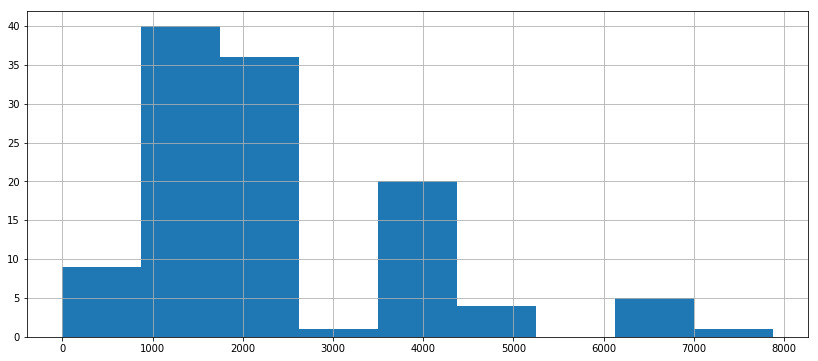

In [30]:
## chart about implementacao numbers
df_deals_num[var].hist(bins=bin_values, figsize=[14,6])

(1843, 61)
(685, 61)


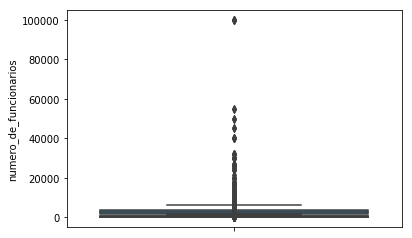

In [101]:
# BoxPlot:
import seaborn as sns
 
# Make boxplot for one group only

sns.boxplot(y=df_deals_num["update_time_month"])
sns.boxplot(y=df_deals_num["value"])
sns.boxplot(y=df_deals_num["implementacao"])
sns.boxplot(y=df_deals_num["volume_de_admissoes_mensal"])
sns.boxplot(y=df_deals_num["numero_de_funcionarios"])
sns.boxplot(y=df_deals_num["activities_to_do"])
sns.boxplot(y=df_deals_num["done_activities"])
sns.boxplot(y=df_deals_num["email_messages_count"])
sns.boxplot(y=df_deals_num["probability"])
sns.boxplot(y=df_deals_num["source"])
sns.boxplot(y=df_deals_num["source1"])
sns.boxplot(y=df_deals_num["total_activities"])

print(df_deals_num.shape)
df_deals_num_filter = df_deals_num[df_deals_num['numero_de_funcionarios'] <= 1000]
print(df_deals_num_filter.shape)
sns.boxplot(y=df_deals_num["numero_de_funcionarios"])
sns.boxplot(y=df_deals_num_filter["numero_de_funcionarios"])